In [167]:
import numpy as np
from collections import defaultdict
import os
from os.path import join 
from tqdm import tqdm
import time
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
from matplotlib import rcParams

from os import listdir
from os.path import isfile, join
from tqdm import tqdm


In [168]:
def read_data(dataroot,file_ending='*Meter.csv'):
    fields = ['Flow ID','Tot Fwd Pkts','Tot Bwd Pkts','Label']
    if file_ending==None:
        print("please specify file ending pattern for glob")
        exit()
    print(join(dataroot,file_ending))
    filenames = [i for i in glob.glob(join(dataroot,file_ending))]
    df_list = []
    for filename in filenames:
        #print(filename)
        df = pd.read_csv(filename,dtype=object,usecols=fields)        
        df_list.append(df)
    combined_csv = pd.concat(df_list,sort=False)
    combined_csv['flow_length']=(combined_csv['Tot Fwd Pkts'].astype(float)+combined_csv['Tot Bwd Pkts'].astype(float))
    combined_csv.drop(columns=['Tot Fwd Pkts','Tot Bwd Pkts'])
    return combined_csv


In [169]:
dataroot = '/home/juma/data/net_intrusion/CIC-IDS-2018/archive_CSVs_complete/CSVs/without_sampling_l'
data= read_data(dataroot)

/home/juma/data/net_intrusion/CIC-IDS-2018/archive_CSVs_complete/CSVs/without_sampling_l/*Meter.csv


In [170]:
data.max()

Flow ID         99.83.14.179-172.31.69.28-62004-9000-6
Tot Fwd Pkts                                     99982
Tot Bwd Pkts                                       992
Label                                   SSH-BruteForce
flow_length                                     309629
dtype: object

In [171]:
grouped_flowrecord_data = data.groupby(['Flow ID','Label'],as_index=False)
flow_data = grouped_flowrecord_data.sum()
flow_data = flow_data.drop(columns=['Flow ID'])

In [172]:
flow_data.head()

Label  flow_length
0  Benign          1.0
1  Benign          2.0
2  Benign          4.0
3  Benign          3.0
4  Benign          4.0

In [173]:
def get_flow_lengths(data):    
    labels = data.Label.unique()
    print("Following labels are observed ", labels)
    
    flow_lengths = defaultdict(list)
    res = data.groupby(['Label'])
    for label in labels:
        res.get_group(label)['flow_length']
        res.get_group(label)['flow_length'].values
        flow_lengths[label] = res.get_group(label)['flow_length']
#         print(flow_lengths[label])
#         print(sum(flow_lengths[label].values))
#         break
    return flow_lengths

In [90]:


flow_lengths = get_flow_lengths(res)

Followiung labeles are observed  ['Benign' 'SSH-BruteForce' 'DoS-SlowHTTPTest' 'Infiltration'
 'DDoS-LOIC-UDP' 'DDoS-LOIC-HTTP' 'DDoS-HOIC' 'DoS-Slowloris'
 'SQL Injection' 'Brute Force-Web' 'Brute Force-XSS' 'DoS-Hulk'
 'DoS-GoldenEye' 'FTP-BruteForce']


In [193]:
df = pd.DataFrame(columns=['Shorter than'])
for key in flow_lengths.keys():
    subset = flow_lengths[key][flow_lengths[key]>=10] 
    #counts
    total_count = flow_lengths[key].count()
    long_count = subset.count()
    short_count = total_count - long_count
    print('{:20}: {:3.0f}% short | {:3.0f}% long '.format(key,short_count/total_count*100,long_count/total_count*100 ))
    


Benign              :  96% short |   4% long 
SSH-BruteForce      :   0% short | 100% long 
DoS-SlowHTTPTest    :   0% short | 100% long 
Infiltration        :   0% short | 100% long 
DDoS-LOIC-UDP       :  76% short |  24% long 
DDoS-LOIC-HTTP      :  23% short |  77% long 
DDoS-HOIC           :   0% short | 100% long 
DoS-Slowloris       :  31% short |  69% long 
SQL Injection       :  12% short |  88% long 
Brute Force-Web     :   1% short |  99% long 
Brute Force-XSS     :   1% short |  99% long 
DoS-Hulk            :   0% short | 100% long 
DoS-GoldenEye       :   3% short |  97% long 
FTP-BruteForce      :   0% short | 100% long 


In [209]:
for key in flow_lengths.keys():
    subset = flow_lengths[key][flow_lengths[key]>=100] 
    #counts
    total_count = flow_lengths[key].count()
    long_count = subset.count()
    short_count = total_count - long_count
    print('{:20}: {:3.0f}% short | {:3.0f}% long '.format(key,short_count/total_count*100,long_count/total_count*100 ))
    


Benign              : 100% short |   0% long 
SSH-BruteForce      :   0% short | 100% long 
DoS-SlowHTTPTest    : 100% short |   0% long 
Infiltration        :   0% short | 100% long 
DDoS-LOIC-UDP       :  81% short |  19% long 
DDoS-LOIC-HTTP      : 100% short |   0% long 
DDoS-HOIC           : 100% short |   0% long 
DoS-Slowloris       : 100% short |   0% long 
SQL Injection       : 100% short |   0% long 
Brute Force-Web     :  50% short |  50% long 
Brute Force-XSS     :   5% short |  95% long 
DoS-Hulk            :   0% short | 100% long 
DoS-GoldenEye       : 100% short |   0% long 
FTP-BruteForce      : 100% short |   0% long 


In [212]:
for key in flow_lengths.keys():
    subset = flow_lengths[key][flow_lengths[key]>=1000] 
    #counts
    total_count = flow_lengths[key].count()
    long_count = subset.count()
    short_count = total_count - long_count
    print('{:20}: {:3.0f}% short | {:3.0f}% long '.format(key,short_count/total_count*100,long_count/total_count*100 ))
    


Benign              : 100% short |   0% long 
SSH-BruteForce      : 100% short |   0% long 
DoS-SlowHTTPTest    : 100% short |   0% long 
Infiltration        :  60% short |  40% long 
DDoS-LOIC-UDP       :  88% short |  12% long 
DDoS-LOIC-HTTP      : 100% short |   0% long 
DDoS-HOIC           : 100% short |   0% long 
DoS-Slowloris       : 100% short |   0% long 
SQL Injection       : 100% short |   0% long 
Brute Force-Web     : 100% short |   0% long 
Brute Force-XSS     : 100% short |   0% long 
DoS-Hulk            :   6% short |  94% long 
DoS-GoldenEye       : 100% short |   0% long 
FTP-BruteForce      : 100% short |   0% long 


In [216]:
for key in flow_lengths.keys():
    subset = flow_lengths[key][flow_lengths[key]>=10000000] 
    #counts
    total_count = flow_lengths[key].count()
    long_count = subset.count()
    short_count = total_count - long_count
    print('{:20}: {:3.0f}% short | {:3.0f}% long '.format(key,short_count/total_count*100,long_count/total_count*100 ))
    


Benign              : 100% short |   0% long 
SSH-BruteForce      : 100% short |   0% long 
DoS-SlowHTTPTest    : 100% short |   0% long 
Infiltration        : 100% short |   0% long 
DDoS-LOIC-UDP       : 100% short |   0% long 
DDoS-LOIC-HTTP      : 100% short |   0% long 
DDoS-HOIC           : 100% short |   0% long 
DoS-Slowloris       : 100% short |   0% long 
SQL Injection       : 100% short |   0% long 
Brute Force-Web     : 100% short |   0% long 
Brute Force-XSS     : 100% short |   0% long 
DoS-Hulk            : 100% short |   0% long 
DoS-GoldenEye       : 100% short |   0% long 
FTP-BruteForce      : 100% short |   0% long 


In [218]:
print(flow_lengths['DDoS-LOIC-UDP'].max())

2669391.0


In [102]:
print(flow_lengths['DoS-Hulk'].values)

[1506. 1370. 1506. ... 1375. 1644. 1368.]


371868
14146
14116


KeyError: 14115

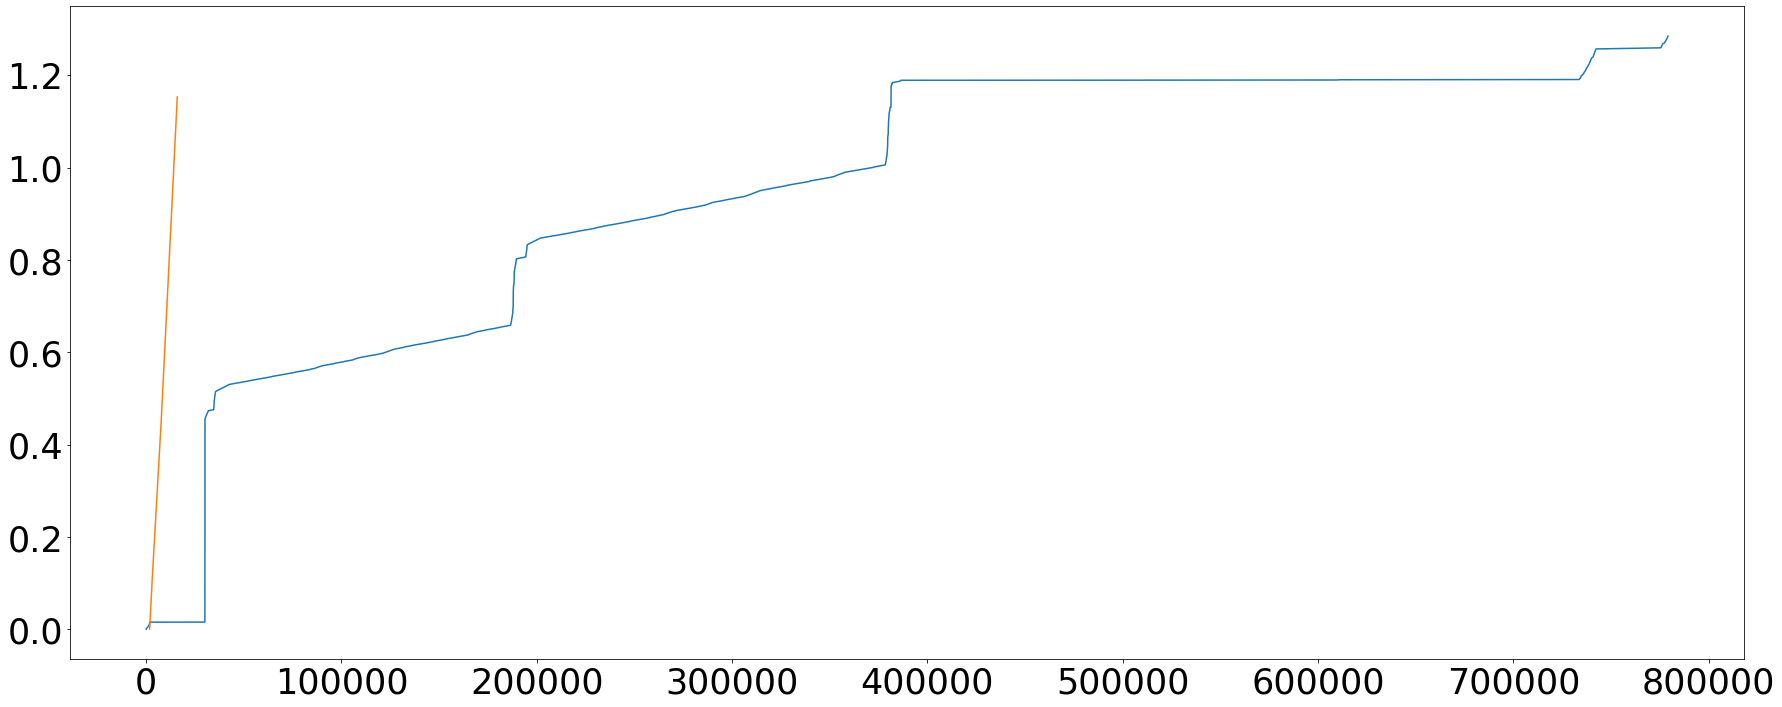

In [165]:
n_bins=100
fig, ax = plt.subplots(figsize=(30, 12))
for key in flow_lengths.keys():
    # plot the cumulative histogram
    C = np.cumsum(flow_lengths[key])
    print(C.shape[0])
    ax.plot(C/C[C.shape[0]-1])
    #n, bins, patches = ax.hist(C, n_bins, density=True, histtype='step',
    #                       cumulative=True, linewidth=4,label=key)
ax.set_xscale('log')
ax.grid()
#ax.legend()

In [151]:
n

array([0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206857,
       0.30206857, 0.30206857, 0.30206857, 0.30206857, 0.30206

In [152]:
bins

array([26.  , 26.02, 26.04, 26.06, 26.08, 26.1 , 26.12, 26.14, 26.16,
       26.18, 26.2 , 26.22, 26.24, 26.26, 26.28, 26.3 , 26.32, 26.34,
       26.36, 26.38, 26.4 , 26.42, 26.44, 26.46, 26.48, 26.5 , 26.52,
       26.54, 26.56, 26.58, 26.6 , 26.62, 26.64, 26.66, 26.68, 26.7 ,
       26.72, 26.74, 26.76, 26.78, 26.8 , 26.82, 26.84, 26.86, 26.88,
       26.9 , 26.92, 26.94, 26.96, 26.98, 27.  , 27.02, 27.04, 27.06,
       27.08, 27.1 , 27.12, 27.14, 27.16, 27.18, 27.2 , 27.22, 27.24,
       27.26, 27.28, 27.3 , 27.32, 27.34, 27.36, 27.38, 27.4 , 27.42,
       27.44, 27.46, 27.48, 27.5 , 27.52, 27.54, 27.56, 27.58, 27.6 ,
       27.62, 27.64, 27.66, 27.68, 27.7 , 27.72, 27.74, 27.76, 27.78,
       27.8 , 27.82, 27.84, 27.86, 27.88, 27.9 , 27.92, 27.94, 27.96,
       27.98, 28.  ])

In [153]:
patches

<a list of 1 Patch objects>

(array([371863., 371864., 371865., 371866., 371867., 371867., 371867.,
        371867., 371867., 371868.]),
 array([1.000000e+00, 3.035920e+04, 6.071740e+04, 9.107560e+04,
        1.214338e+05, 1.517920e+05, 1.821502e+05, 2.125084e+05,
        2.428666e+05, 2.732248e+05, 3.035830e+05]),
 <a list of 10 Patch objects>)

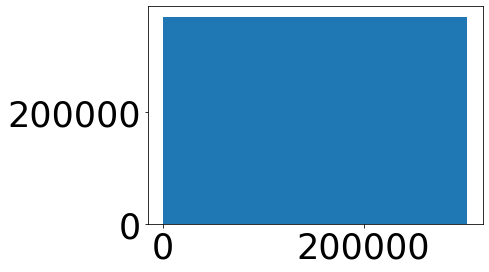

In [123]:
plt.hist(flow_lengths['Benign'],cumulative=1,bins=10)

In [198]:
flow_lengths.keys()

dict_keys(['Benign', 'SSH-BruteForce', 'DoS-SlowHTTPTest', 'Infiltration', 'DDoS-LOIC-UDP', 'DDoS-LOIC-HTTP', 'DDoS-HOIC', 'DoS-Slowloris', 'SQL Injection', 'Brute Force-Web', 'Brute Force-XSS', 'DoS-Hulk', 'DoS-GoldenEye', 'FTP-BruteForce'])

In [207]:

#np.random.seed(1968080)
#colors = np.random.rand(20)
colors = ['b','m','g','c','m','g','y','r','c','0.75','g','y','r','b','c']

def make_graph(flow_lengths,dataset_name,ax,marker_size):
    markers =   ['3','4','<','8','*','2','p','2','1','d','v','x','^','+','>']
    facecolors =[] 
    cmap = plt.get_cmap('viridis')
    #colors = cmap(np.linspace(0, 255, len(markers)))
    
    num_attacks = len(flow_lengths.keys())
    for i,label in enumerate(sorted(flow_lengths.keys())):
        #if 'DDoS-HOIC'!=label:
        #    continue
        flow_length_per_label = flow_lengths[label]
        num_flows = sum(flow_length_per_label.values)
        
        length_indices = np.array(flow_length_per_label.index).astype(int)
        length_counts = flow_length_per_label.values
        length_counts = length_counts/length_counts.sum()*100
        sorted_indices = np.argsort(length_indices)
        
        #length_indices = length_indices[sorted_indices]
        #length_counts = length_counts[sorted_indices]
        
        if 1==1:#markers[i] in ('d','*','>','p'):
            ax.plot(length_indices,length_counts,markersize=marker_size,label=label,
                   alpha=.95,marker=markers[i],color=colors[i],markerfacecolor='none',markeredgewidth=5,linewidth=3)
        else:
            ax.plot(length_indices,length_counts,markersize=marker_size,label=label,
                   alpha=.95,marker=markers[i],color=colors[i])
        
        
    #ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Flow Size (log scale)')
    ax.set_ylabel('Flow Percentage(%)')
    ax.set_xlim(-10,10**6)
    ax.set_ylim(-10,120)
    ax.grid(linestyle='-', linewidth=3)
    #ax.legend(bbox_to_anchor=(1., 1.01))
    ax.legend(ncol=4)
    ax.margins(0.1)

/home/juma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


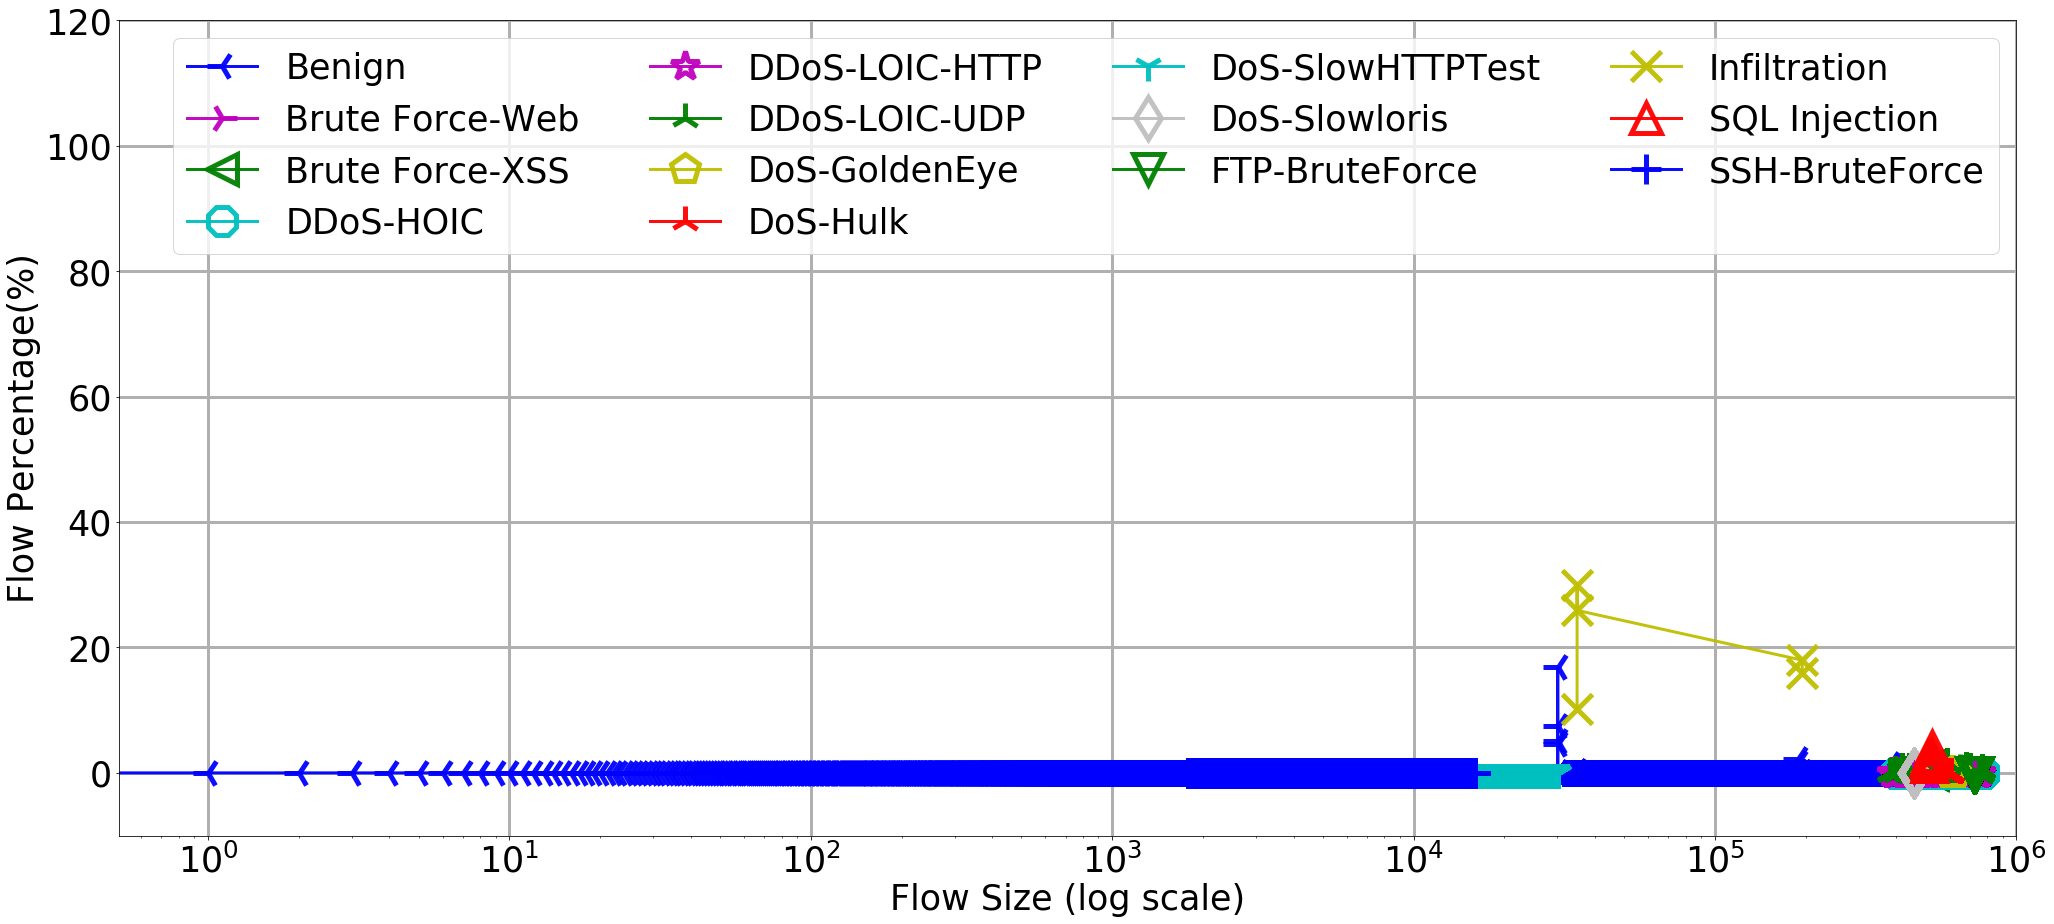

In [208]:
#import matplotlib
#matplotlib.pyplot.install_repl_displayhook()
font = {'size'   : 35}
plt.rc('font', **font)
    
plt.close()

label = 'CIC-IDS-2018'
size=30
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(34,15)) 
make_graph(flow_lengths,label,ax,size)
        
#plt.tight_layout()
#plt.savefig(join(dataroot,'flow_size_per_attack_s_{}.png'.format(size)))
plt.show()

In [ ]:
sort(flow_lengths['SSH-BruteForce'].index)

In [ ]:
plt.scatter(np.log(flow_lengths['DDoS-LOIC-UDP'].index),flow_lengths['DDoS-LOIC-UDP'].values)
plt.show()

In [ ]:
ax.legend()


In [ ]:
font = {'size'   : 25}
plt.rc('font', **font)


dataroots = ['/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l']
labels = ['CIC-IDS-2018']
flow_lengths_per_dataset = []

for dataroot in dataroots:
    flow_lengths = get_flow_lengths(dataroot)
    flow_lengths_per_dataset.append(flow_lengths)

    
    plt.close()
    size=3
    fig, ax = plt.subplots(nrows=1,ncols=len(dataroots),sharex=False,figsize=(10*2,5*2)) 
    for i,flow_lengths in enumerate(flow_lengths_per_dataset):
        label = labels[i]
        make_graph(flow_lengths,label,ax,size)
    
    
    plt.tight_layout()
    plt.savefig(join(dataroot,'flow_size_per_attack_s_{}.png'.format(size)))
    plt.show()